In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Objectives

- Analyze Amazon's product recommendations to identify areas for improvement
- Examine products with positive reviews and derive insights from the analysis
- Compare and contrast reviews given by frequent and infrequent users, presenting the results in percentage form
- Perform sentiment analysis using TextBlob to determine the number of positive and negative reviews
- Provide an overall sentiment overview of the product reviews

# Reading SQLite Database

In [3]:
import sqlite3

In [4]:
con = sqlite3.connect(r'C:\Users\Gal\Desktop\DA Singh/database.sqlite')

In [5]:
type(con)

sqlite3.Connection

In [6]:
df= pd.read_sql_query('SELECT * FROM REVIEWS', con)

In [7]:
df.shape

(568454, 10)

# Exploratory Data Analysis

#### Data Preparation

In [8]:
df.head(4)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...


In [9]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

- HelpfulnessNumerator = number of customers that shares feedback
- Denominator = number of customers that already have seen the feedback (how many people reviewed)

HelpfulnessNumerator is always less than or equal to Denominator

In [10]:
df['HelpfulnessNumerator'] > df['HelpfulnessDenominator'] # invalid row

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [11]:
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [12]:
df_valid = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']] # valid rows

In [13]:
df_valid.shape

(568452, 10)

In [14]:
df_valid.columns # corrected & revised dataframe

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

#### Checking Duplicate Rows

Checking duplicates based on UserId, ProfileName, Time, Text as No user can type a review on same exact time for different products, so we will remove those records

In [15]:
df_valid.duplicated(['UserId','ProfileName','Time','Text'])

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568452, dtype: bool

In [16]:
df_valid[df_valid.duplicated(['UserId','ProfileName','Time','Text'])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


There are about 174521 duplicated rows

In [17]:
data = df_valid.drop_duplicates(subset=['UserId','ProfileName','Time','Text'])

In [18]:
data.shape

(393931, 10)

In [19]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [20]:
data['Time'] # convert to datetime64[ns]

0         1303862400
1         1346976000
2         1219017600
3         1307923200
4         1350777600
             ...    
568449    1299628800
568450    1331251200
568451    1329782400
568452    1331596800
568453    1338422400
Name: Time, Length: 393931, dtype: int64

In [21]:
pd.to_datetime(data['Time'], unit = 's')

0        2011-04-27
1        2012-09-07
2        2008-08-18
3        2011-06-13
4        2012-10-21
            ...    
568449   2011-03-09
568450   2012-03-09
568451   2012-02-21
568452   2012-03-13
568453   2012-05-31
Name: Time, Length: 393931, dtype: datetime64[ns]

In [22]:
data['Time'] = pd.to_datetime(data['Time'], unit = 's')

In [23]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...


# Analysing How Amazon Can Provide More Product Recommendations to Its Users

Amazon can recommend more products to its users. In other words, it seeks to understand how Amazon's recommendation system can be improved to suggest additional or relevant products to its users.

- using Conversion Rate

In [24]:
# ada 67624 jenis productID
data['ProductId'].nunique()

67624

In [25]:
# identifikasi productID yang paling laku terjual
data['ProductId'].value_counts().idxmax()

'B007JFMH8M'

In [26]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [27]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


In [28]:
data['UserId'].nunique()

256059

#### Applying agg() function

In [29]:
# key: value
data.groupby(['UserId']).agg({'Summary':'count',
                             'Text':'count',
                             'Score': 'mean',
                             'ProductId': 'count'}).sort_values(by='ProductId', ascending=False)

,Summary,Text,Score,ProductId
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [30]:
recommend_df = data.groupby(['UserId']).agg({'Summary':'count',
                             'Text':'count',
                             'Score': 'mean',
                             'ProductId': 'count'}).sort_values(by='ProductId', ascending=False)

In [31]:
recommend_df.columns=['Number_of_summaries','num_text','avg_score','No_of_prods_purchased']

In [32]:
recommend_df

,Number_of_summaries,num_text,avg_score,No_of_prods_purchased
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [33]:
recommend_df.index[0:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [34]:
recommend_df['No_of_prods_purchased'][0:10].values

array([329, 278, 259, 214, 211, 161, 146, 129, 119, 118], dtype=int64)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AY12DBB0U420B'),
  Text(1, 0, 'A3OXHLG6DIBRW8'),
  Text(2, 0, 'A281NPSIMI1C2R'),
  Text(3, 0, 'A1YUL9PCJR3JTY'),
  Text(4, 0, 'A1Z54EM24Y40LL'),
  Text(5, 0, 'A2MUGFV2TDQ47K'),
  Text(6, 0, 'A3D6OI36USYOU1'),
  Text(7, 0, 'AZV26LP92E6WU'),
  Text(8, 0, 'AKMEY1BSHSDG7'),
  Text(9, 0, 'A2GEZJHBV92EVR')])

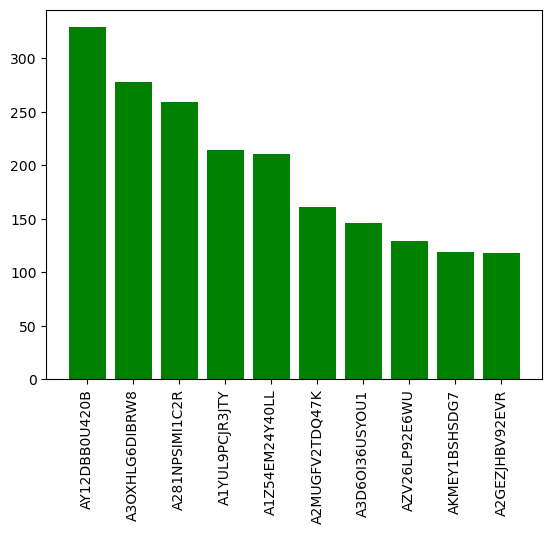

In [35]:
plt.bar(recommend_df.index[0:10],recommend_df['No_of_prods_purchased'][0:10].values, color='green')
plt.xticks(rotation='vertical')

Identifying the Top 10 Users presents a significant opportunity to provide more product recommendations. Given their high likelihood of making additional purchases, targeting these users can lead to increased sales

# Analysing Products Having Good Number of Reviews

Frequent sold products have good number of reviews

In [36]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [37]:
len(data['ProductId'].unique())

67624

In [38]:
# to_frame() CONVERT SERIES INTO DF
product_count = data['ProductId'].value_counts().to_frame()

In [39]:
data['UserId'].value_counts().to_frame()

,UserId
AY12DBB0U420B,329
A3OXHLG6DIBRW8,278
A281NPSIMI1C2R,259
A1YUL9PCJR3JTY,214
A1Z54EM24Y40LL,211
...,...
AAQPR1MSRXKTU,1
AGO81Z6PZSF7P,1
ALA84XWMTQBFT,1
A1G9DK8EUR36JC,1


In [40]:
# product sold > 500
product_count

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B002DNX4GO,1
B000FM2YU2,1
B001M1VA32,1
B009858H6M,1


In [41]:
product_count[product_count['ProductId'] > 500]

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541
B0090X8IPM,530


In [42]:
product_count[product_count['ProductId'] > 500].index

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object')

In [43]:
product_count

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B002DNX4GO,1
B000FM2YU2,1
B001M1VA32,1
B009858H6M,1


In [44]:
freq_prod_ids = product_count[product_count['ProductId'] > 500].index

In [45]:
freq_prod_ids

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object')

In [46]:
data['ProductId'].isin(freq_prod_ids)

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Name: ProductId, Length: 393931, dtype: bool

In [47]:
freq_prod_df = data[data['ProductId'].isin(freq_prod_ids)]

In [48]:
freq_prod_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [105]:
freq_prod_df[['ProductId','Score']].value_counts()

ProductId   Score
B007JFMH8M  5        623
B003B3OOPA  5        517
B000NMJWZO  5        502
B002QWP89S  5        497
B001EO5Q64  5        473
B000UBD88A  5        364
B0013NUGDE  5        364
B005ZBZLT4  5        351
B005K4Q37A  5        307
B007JFMH8M  4        217
B000KV61FC  5        197
B0090X8IPM  4        192
            5        164
            3        111
B000KV61FC  3        101
B005K4Q37A  1         96
B000KV61FC  4         91
B0013NUGDE  4         90
B000KV61FC  1         89
B000UBD88A  4         87
B000KV61FC  2         78
B002QWP89S  4         74
B003B3OOPA  4         67
B005ZBZLT4  4         67
B001EO5Q64  4         65
B005K4Q37A  4         65
B007JFMH8M  3         56
B0013NUGDE  3         46
B005K4Q37A  2         45
B0090X8IPM  2         37
B000UBD88A  3         37
B005ZBZLT4  3         36
B000UBD88A  1         33
B005ZBZLT4  1         30
B0013NUGDE  1         29
            2         29
B005K4Q37A  3         28
B0090X8IPM  1         26
B002QWP89S  1         26
B003B3O

<Axes: xlabel='count', ylabel='ProductId'>

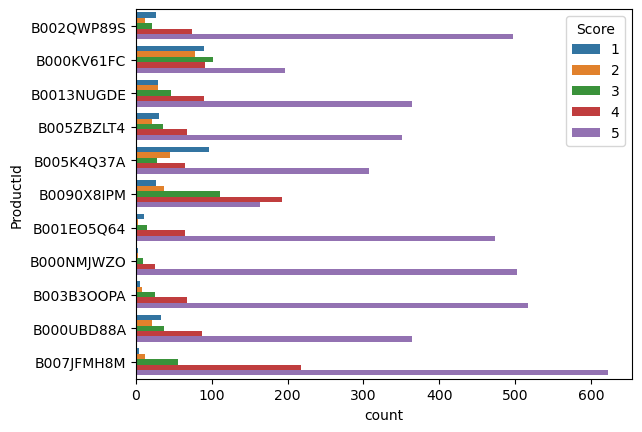

In [49]:
sns.countplot(y='ProductId', data=freq_prod_df, hue='Score')

Recommendation for this case:
- Promote Best-Selling Product: Product ID 'B007JFMH8M' is the best-selling item with a very high review score of 5. Further promote this product to attract more buyers and boost sales
- Evaluate Marketing Strategies: Review marketing strategies for products like 'B005K4Q37A', 'B0090X8IPM', 'B005ZBZLT4', and others with varying review scores. Adjust or improve marketing strategies to increase sales and customer satisfaction
- Identify Reasons for Low Scores: Products with IDs 'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', and others have lower review scores. Investigate the reasons behind these low scores. There might be issues with product quality, customer service, or other aspects that need to be addressed

# Analysing Amazon Users Behaviour

- The difference between behaviour of frequent viewers & not frequent viewers

- frequent viewers = those who have bought products at least 50 times or more

- not frequent viewers = < 50x

In [50]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [51]:
x = data['UserId'].value_counts()

In [52]:
data.head(7)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,2012-07-12,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,2012-06-20,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...


In [53]:
x
# userID AY12DBB0U420B bought 329 products

AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
AAQPR1MSRXKTU       1
AGO81Z6PZSF7P       1
ALA84XWMTQBFT       1
A1G9DK8EUR36JC      1
A3LGQPJCZVL9UC      1
Name: UserId, Length: 256059, dtype: int64

In [54]:
x['AY12DBB0U420B']

329

In [97]:
# creating new df
data['viewer_type'] = data['UserId'].apply(lambda user: 'Frequent' if x[user]>50 else 'Not Frequent')

In [56]:
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent


The Distribution of The Rating

creating new df
- value of not frequent viewer
- value of frequent viewer

In [57]:
data['viewer_type'] == 'Not Frequent'

0         True
1         True
2         True
3         True
4         True
          ... 
568449    True
568450    True
568451    True
568452    True
568453    True
Name: viewer_type, Length: 393931, dtype: bool

In [58]:
not_freq_df = data[data['viewer_type'] == 'Not Frequent']
freq_df = data[data['viewer_type'] == 'Frequent']

#### Frequent Viewer Distribution

In [59]:
freq_df['Score'].value_counts()

5    5765
4    1979
3     897
2     368
1     349
Name: Score, dtype: int64

In [60]:
freq_df['Score'].value_counts()/len(freq_df)*100

5    61.605044
4    21.147681
3     9.585381
2     3.932464
1     3.729429
Name: Score, dtype: float64

<Axes: >

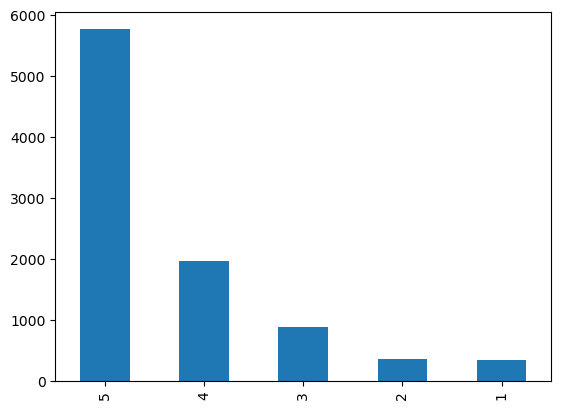

In [61]:
freq_df['Score'].value_counts().plot(kind='bar')

- Type 5 review has a percentage of 61.60%, indicating it's the most common review among frequent buyers

- Type 4 review has a percentage of 21.15%, which is significant but lower than type 5

- Type 3 review has a percentage of 9.59%, showing it's less common compared to types 5 and 4

- Type 2 review has a percentage of 3.93%, suggesting it's rarely encountered among frequent buyers

- Type 1 review has a percentage of 3.73%, being the least common review among this group of users

#### Not Frequent Distribution

In [62]:
not_freq_df['Score'].value_counts()

5    245196
4     54114
1     35957
3     28872
2     20434
Name: Score, dtype: int64

In [63]:
not_freq_df['Score'].value_counts()/len(not_freq_df)*100

5    63.757986
4    14.071191
1     9.349850
3     7.507547
2     5.313426
Name: Score, dtype: float64

<Axes: >

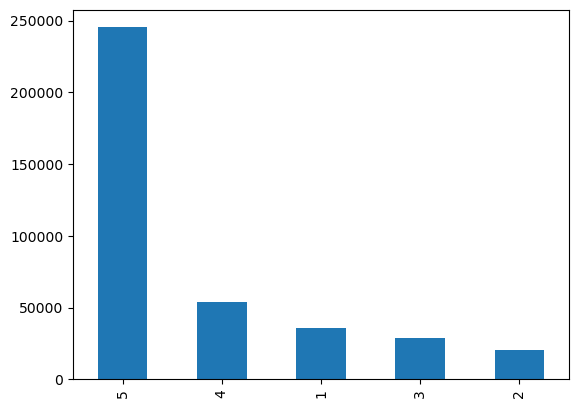

In [64]:
not_freq_df['Score'].value_counts().plot(kind='bar')

- Type 5 reviews are the most common among not frequent users, with a high percentage of 63.76% and a count of 245,196

- Type 4 reviews are the second most common, with a percentage of 14.07% and a count of 54,114

- Type 1 reviews have a moderate presence, with a percentage of 9.35% and a count of 35,957

- Type 3 reviews have a slightly lower percentage of 7.51% and a count of 28,872

- Type 2 reviews are the least common among not frequent users, with a percentage of 5.31% and a count of 20,434


- Frequent users appear to be more discerning in the sense that they give less extreme reviews than infrequent reviews

# Analysing Frequent Users Whether They Are Verbose or Not

In [65]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'viewer_type'],
      dtype='object')

In [66]:
data['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 393931, dtype: object

In [67]:
data[['UserId','ProductId','Text']]

,UserId,ProductId,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,This is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,Great taffy at a great price. There was a wid...
...,...,...,...
568449,A28KG5XORO54AY,B001EO7N10,Great for sesame chicken..this is a good if no...
568450,A3I8AFVPEE8KI5,B003S1WTCU,I'm disappointed with the flavor. The chocolat...
568451,A121AA1GQV751Z,B004I613EE,"These stars are small, so you can give 10-15 o..."
568452,A3IBEVCTXKNOH,B004I613EE,These are the BEST treats for training and rew...


- adding 1 column = length of Text
- frequent = checking whether verbose or not
- not frequent = checking whether verbose or not

In [68]:
data['Text'][0]
# counting the total words (index 0)

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [69]:
len(data['Text'][0].split(' '))

49

In [70]:
def calculate_length(text):
    return len(text.split(' '))

In [71]:
data['Text_length'] = data['Text'].apply(calculate_length)

In [72]:
data['viewer_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [73]:
not_freq_data = data[data['viewer_type'] == 'Not Frequent']
freq_data = data[data['viewer_type'] == 'Frequent']

In [74]:
not_freq_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...,Not Frequent,26
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...,Not Frequent,46
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Not Frequent,71
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...,Not Frequent,37


(0.0, 600.0)

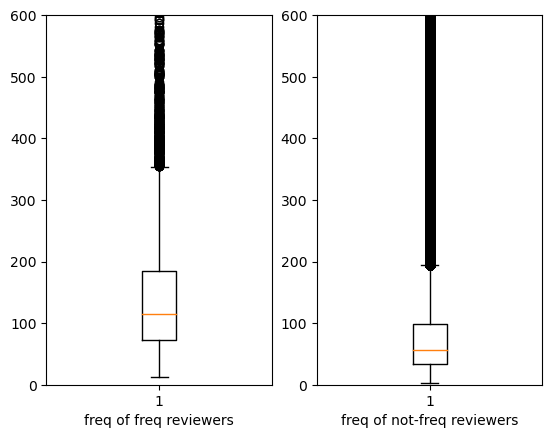

In [75]:
fig = plt.figure()

ax1= fig.add_subplot(121)
ax1.boxplot(freq_data['Text_length'])
ax1.set_xlabel('freq of freq reviewers')
ax1.set_ylim(0,600)


ax2 = fig.add_subplot(122)
ax2.boxplot(not_freq_data['Text_length'])
ax2.set_xlabel('freq of not-freq reviewers')
ax2.set_ylim(0,600)

The distributions of word counts for frequent and not frequent reviews shows that 
infrequent reviewers have a large amount of reviews of low word count.
On the other hand, the largest concentration of word count is higher for frequent reviewers than for infrequent reviews

# Sentiment Analysis

- with TextBlob
- Counter

[0,1] polarity analysis

In [76]:
!pip install textblob

In [77]:
from textblob import TextBlob

#### Polarity Value

- polarity value of -1 indicates a very negative sentiment
- polarity value of 0 indicates a neutral sentiment
- polarity value of 1 indicates a very positive sentiment

#### Subjectivity

- subjectivity value of 0 indicates an objective or factual statement with no personal opinion
- subjectivity value of 1 indicates a highly subjective text with strong personal opinion or bias


In [78]:
data['Summary']

0                      Good Quality Dog Food
1                          Not as Advertised
2                      "Delight" says it all
3                             Cough Medicine
4                                Great taffy
                         ...                
568449                   Will not do without
568450                          disappointed
568451              Perfect for our maltipoo
568452    Favorite Training and reward treat
568453                           Great Honey
Name: Summary, Length: 393931, dtype: object

In [79]:
data['Summary'][0]

'Good Quality Dog Food'

In [80]:
TextBlob('Good Quality Dog Food').sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [81]:
data.shape

(393931, 12)

In [82]:
sample =data[0:50000]

In [83]:
polarity = []
for text in sample['Summary']:
    try: 
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
            polarity.append(0)

In [84]:
len(polarity)

50000

In [85]:
sample['polarity'] = polarity

In [86]:
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_length,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30,0.8


In [87]:
sample_negative = sample[sample['polarity']<0]
sample_positive = sample[sample['polarity']>0]

In [88]:
from collections import Counter

#### Negative summary

In [89]:
Counter(sample_negative['Summary'])

Counter({'poor taste': 2,
         'Nasty No flavor': 1,
         'How can you go wrong!': 1,
         'pretty expensive': 1,
         'stale product.': 1,
         'Bigger then other brands': 1,
         'Order only in cold weather': 1,
         'Bad': 4,
         'disappointing': 9,
         'My every day green tea': 1,
         'BROKEN BOTTLE BOTTOMS!': 1,
         'Tasteless but low calorie': 1,
         "Marley's Mellow Mood Lite - Half Tea Half Lemonade": 1,
         'Nearly killed the cats': 1,
         'CHANGED FORMULA MAKES CATS SICK!!!!': 1,
         'Not a real tea': 1,
         'Mcclures bloody Mary mix': 1,
         'Not Good': 8,
         'Eukanuba puppy small breed dog food': 1,
         'My everyday cup of Tea': 1,
         'Disappointed': 44,
         'Sad outcome': 1,
         "Don't Waste Your Money": 2,
         'Disappointed!': 4,
         'sugar in the raw': 1,
         'Good product but terrible agricultural practices': 1,
         'Sugar in the raw': 2,
        

In [90]:
Counter(sample_negative['Summary']).most_common(10)

[('Disappointed', 44),
 ('Disappointing', 32),
 ('Bland', 18),
 ('Awful', 17),
 ('Not what I expected', 17),
 ('Terrible', 15),
 ('Horrible', 15),
 ('disappointed', 15),
 ('Disgusting', 12),
 ('not good', 11)]

In [91]:
sample_negative['Summary']

16                  poor taste
26             Nasty No flavor
57       How can you go wrong!
61            pretty expensive
62              stale product.
                 ...          
54185                 Horrible
54186            Horrible idea
54191                    STALE
54212             Disappointed
54251      Just not very good!
Name: Summary, Length: 4659, dtype: object

#### Positive summary

In [92]:
sample_positive['Summary']

0                                Good Quality Dog Food
4                                          Great taffy
5                                           Nice Taffy
6        Great!  Just as good as the expensive brands!
7                               Wonderful, tasty taffy
                             ...                      
54248                 My favorite nescafe dolce flavor
54249                                  My 2nd Favorite
54250                      Best of 5 flavors available
54252                                 pricey but good.
54253                         Best I have found so far
Name: Summary, Length: 29155, dtype: object

In [93]:
Counter(sample_positive['Summary'])

Counter({'Good Quality Dog Food': 1,
         'Great taffy': 2,
         'Nice Taffy': 1,
         'Great!  Just as good as the expensive brands!': 1,
         'Wonderful, tasty taffy': 1,
         'Healthy Dog Food': 1,
         'The Best Hot Sauce in the World': 1,
         'My cats LOVE this "diet" food better than their regular food': 1,
         'My Cats Are Not Fans of the New Food': 1,
         'fresh and greasy!': 1,
         'Love it!': 81,
         'GREAT SWEET CANDY!': 1,
         'Always fresh': 1,
         'Delicious product!': 2,
         'Great Bargain for the Price': 1,
         'Great machine!': 1,
         'Best of the Instant Oatmeals': 1,
         'Good Instant': 1,
         'Great Irish oatmeal for those in a hurry!': 1,
         'satisfying': 1,
         'Love Gluten Free Oatmeal!!!': 1,
         'GOOD WAY TO START THE DAY....': 1,
         "Wife's favorite Breakfast": 1,
         "Why wouldn't you buy oatmeal from Mcanns? Tastes great!": 1,
         'Good Hot Bre

In [94]:
Counter(sample_positive['Summary']).most_common(10)

[('Delicious!', 208),
 ('Delicious', 204),
 ('Great product', 100),
 ('Excellent', 85),
 ('Love it!', 81),
 ('Great', 81),
 ('Great Product', 77),
 ('Great!', 70),
 ('Good stuff', 51),
 ('Awesome', 50)]

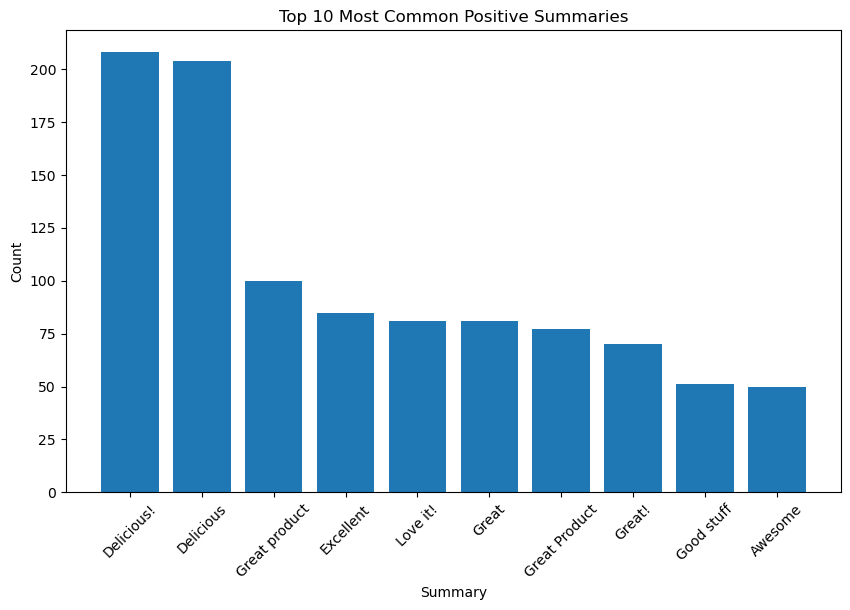

In [95]:
import matplotlib.pyplot as plt
from collections import Counter

# Taking Data from Counter (positive)
sample_positive_summary = Counter(sample_positive['Summary']).most_common(10)

# Extracting the sum of positive summary
summary_positive = [item[0] for item in sample_positive_summary]
count_positive = [item[1] for item in sample_positive_summary]

# plot distribution
plt.figure(figsize=(10, 6))
plt.bar(summary_positive, count_positive)
plt.xlabel('Summary')
plt.ylabel('Count')
plt.title('Top 10 Most Common Positive Summaries')
plt.xticks(rotation=45)
plt.show()


- Products described as "Delicious!" and "Delicious" stand out as highly favorable, along with expressions like "Great product", "Excellent", and "Love it!". Highlighting these products in marketing efforts can help attract and engage potential customers, leveraging the positive sentiments expressed by existing satisfied buyers

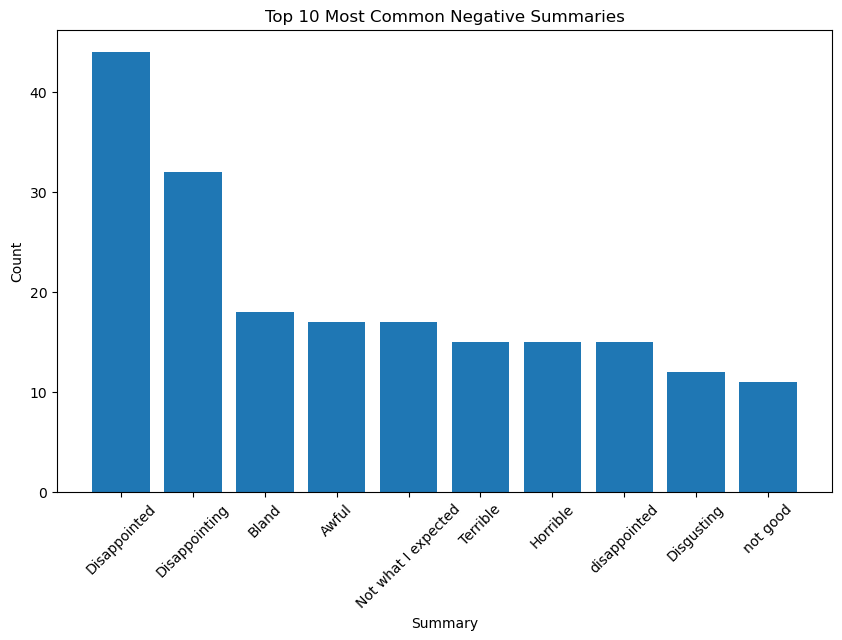

In [103]:
# Negative Summary
sample_negative_summary = Counter(sample_negative['Summary']).most_common(10)

summary_negative = [item[0] for item in sample_negative_summary]
count_negative = [item[1] for item in sample_negative_summary]

# Distribution Plot
plt.figure(figsize=(10, 6))
plt.bar(summary_negative, count_negative)
plt.xlabel('Summary')
plt.ylabel('Count')
plt.title('Top 10 Most Common Negative Summaries')
plt.xticks(rotation=45)
plt.show()

- Paying attention to complaints related to "Disappointed", "Disappointing", "Bland", "Awful", "Not what I expected", "Terrible", "Horrible", "disappointed", "Disgusting", and "not good" can help in improving product quality and customer satisfaction. Addressing these concerns may lead to a more positive overall sentiment from customers and increase the likelihood of repeat purchases and positive word-of-mouth recommendations